# Data Load

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [151]:
train = pd.read_csv("data/bike/train.csv", parse_dates = ["datetime"])
test = pd.read_csv("data/bike/test.csv", parse_dates = ["datetime"])

print(train.shape, test.shape)
print(train.info(), test.info())

(10886, 12) (6493, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null datetime64[ns]
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humid

# Data Pre-processing

## (1) NaN Check --> No Issue

In [152]:
train[:].describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [153]:
test[:].describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


## (2) Date Encoding

In [154]:
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
# train["minute"] = train["datetime"].dt.minute
train["dayofweek"] = train["datetime"].dt.dayofweek

train.head()

test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.day
test["hour"] = test["datetime"].dt.hour
# train["minute"] = train["datetime"].dt.minute
test["dayofweek"] = test["datetime"].dt.dayofweek

print(train.shape, test.shape)
test.head()

(10886, 17) (6493, 14)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,dayofweek
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,3


## (3) Categorization --> No Impact for Result

In [155]:
category_feature = ["season", "holiday", "workingday", "weather", "year", "month", "dayofweek", "day"]

# print(train.info(), test.info())

for var in category_feature:
    train[var] = train[var].astype("category")
    test[var] = test[var].astype("category")

# print(train.info(), test.info())

## (4) WindSpeed 0 Predict --> No Impact

train.loc[train["windspeed"] == 0, "wind0"] = "wind0"
train_wind0 = train.loc[train["windspeed"] == 0]
train_windnot0 = train.loc[train["windspeed"] != 0]
print(train.shape, train_wind0.shape, train_windnot0.shape)

#windspeed 함수 만들기
#RandaomForestRegressor든 RandomForestClassifier든 같다.
#오히려 이미 windspeed 값이 있는 것들을 모아서, 그것 내에서 CV를 체크해서 모델을 만들어놓고, 0을 예측하는게 정확할 듯

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

def predict_windspeed(data):
    
    datawind0 = data.loc[data["windspeed"] == 0]
    datawindnot0 = data.loc[data["windspeed"] != 0]
    
    wind_col = ['year', 'month', 'day', 'hour']

    datawindnot0["windspeed"] = datawindnot0["windspeed"].astype("str")  
    # 스트링으로 다시 설정하는 이유가 무엇일지?
    
    model_wind = RandomForestClassifier()
    
    model_wind.fit(datawindnot0[wind_col], datawindnot0["windspeed"])
    
    wind0values = model_wind.predict(X = datawind0[wind_col])
    # 왜 X = 라는 것을 넣는지?
    
    predict_wind0 = datawind0
    predict_windnot0 = datawindnot0
    
    predict_wind0["windspeed"] = wind0values
    
    data = predict_windnot0.append(predict_wind0)
    
    data["windspeed"] = data["windspeed"].astype("float")
    
    data.reset_index(inplace = True) ## 인덱스를 다시 설정하는 기능이라는데, 조금더 스터디 필요함
    data.drop("index", inplace = True, axis = 1)
    
    return data

train_wind0 = train.loc[train["windspeed"] == 0]
print(train_wind0.shape)
train_wind0.head()

train = predict_windspeed(train)

train_wind0 = train.loc[train["windspeed"] == 0]
print(train_wind0.shape)
print(train.shape)
#train.head(100)
train.to_csv("data/bike/train_wind0.csv")

test = predict_windspeed(test)

test_wind0 = test.loc[test["windspeed"] == 0]
print(test_wind0.shape)
test_wind0.head()

print(test.shape)
test.head()

## (5) Windspeed, temp, humidity Encoding --> Partial Impact

In [156]:
#sns.lmplot(data = train, x = "temp", y = "count")
train["temp"].quantile(0.1)
train["temp"].quantile(0.9)

#temp가 feature importance가 가장 높으므로 먼저 테스트
train.loc[train["temp"] < 5, "temp_encode"] = 0
train.loc[(train["temp"] >= 5) & (train["temp"] < 15), "temp_encode"] = 1
train.loc[(train["temp"] >= 15) & (train["temp"] < 25), "temp_encode"] = 2
train.loc[(train["temp"] >= 25) & (train["temp"] < 35), "temp_encode"] = 3
train.loc[train["temp"] >= 35, "temp_encode"] = 4

test.loc[test["temp"] < 5, "temp_encode"] = 0
test.loc[(test["temp"] >= 5) & (test["temp"] < 15), "temp_encode"] = 1
test.loc[(test["temp"] >= 15) & (test["temp"] < 25), "temp_encode"] = 2
test.loc[(test["temp"] >= 25) & (test["temp"] < 35), "temp_encode"] = 3
test.loc[test["temp"] >= 35, "temp_encode"] = 4

In [157]:
#humidity => humidity_encode
train.loc[train["humidity"] < 38, "humidity_encode"] = 0
train.loc[(train["humidity"] >= 38) & (train["humidity"] < 48), "humidity_encode"] = 1
train.loc[(train["humidity"] >= 48) & (train["humidity"] < 58), "humidity_encode"] = 2
train.loc[(train["humidity"] >= 58) & (train["humidity"] < 68), "humidity_encode"] = 3
train.loc[(train["humidity"] >= 68) & (train["humidity"] < 78), "humidity_encode"] = 4
train.loc[(train["humidity"] >= 78) & (train["humidity"] < 88), "humidity_encode"] = 5
train.loc[train["humidity"] >= 88, "humidity_encode"] = 6

test.loc[test["humidity"] < 38, "humidity_encode"] = 0
test.loc[(test["humidity"] >= 38) & (test["humidity"] < 48), "humidity_encode"] = 1
test.loc[(test["humidity"] >= 48) & (test["humidity"] < 58), "humidity_encode"] = 2
test.loc[(test["humidity"] >= 58) & (test["humidity"] < 68), "humidity_encode"] = 3
test.loc[(test["humidity"] >= 68) & (test["humidity"] < 78), "humidity_encode"] = 4
test.loc[(test["humidity"] >= 78) & (test["humidity"] < 88), "humidity_encode"] = 5
test.loc[test["humidity"] >= 88, "humidity_encode"] = 6

# Model Load

In [158]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,
                              n_estimators = 100,
                             random_state = 79)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=79, verbose=0, warm_start=False)

In [181]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'dayofweek', 'temp_encode',
       'humidity_encode'],
      dtype='object')

In [201]:
feature_names = ['hour', 'year', 'temp_encode', 'dayofweek', 'workingday',
       'atemp', 'humidity', 'weather', 'season', 'windspeed', 'month'] 
        # Gradient Boost 사용 (오늘의 코드)
        # RMSLE = 0.2088 Kaggle = 0.3788  (104위 / 3251명 중 상위 3.2%)
        # (vs. 오늘의 코드 RMSLE = 0.2135 Kaggle = 0.38677)

feature_names13 = ['hour', 'year', 'temp_encode', 'dayofweek', 'workingday',
       'atemp', 'humidity', 'weather', 'season', 'windspeed', 'month'] 
        # month 추가
        # RMSLE = 0.19898 Kaggle = 0.4232  (오히려 낮아짐)
        
feature_names12 = ['hour', 'year', 'temp_encode', 'dayofweek', 'workingday',
       'atemp', 'humidity', 'season'] 
        # windspeed, weather 제외 (gbm의 feature importance가 낮은 bottom 2개)
        # MAE 33.53  #RMSLE = 0.3780(RF)
        # RMSLE = 0.2066 # Kaggle = 0.4087  

feature_names11 = ['hour', 'year', 'temp', 'dayofweek', 'workingday',
       'atemp', 'humidity', 'weather', 'season', 'windspeed'] 
        # temp_encode --> temp
        # MAE 32.36  #RMSLE = 0.3711(RF)
        # RMSLE = 0.2066 # Kaggle = 0.3818    

feature_names10 = ['hour', 'year', 'temp_encode', 'dayofweek', 'workingday',
       'atemp', 'humidity_encode', 'weather', 'season', 'windspeed'] 
        # humidity --> humidity_encode
        # MAE 32.37  #RMSLE = 0.3683(RF)
        # RMSLE = 0.2160 # Kaggle = 0.3792    

feature_names9 = ['hour', 'year', 'temp_encode', 'dayofweek', 'workingday',
       'atemp_encode', 'humidity', 'weather', 'season', 'windspeed'] 
        # atemp ==> atemp_encode
        # MAE 35.38  #RMSLE = 0.3811(RF)
        # RMSLE = 0.2352 #Kaggle = 0.3857
    
feature_names8 = ['hour', 'year', 'temp_encode', 'dayofweek', 'workingday',
       'atemp', 'humidity', 'weather', 'season', 'windspeed'] 
        # DS스쿨 버전으로 season, windspeed 추가 & month 제외 
        # MAE 32.48  # RMSLE = 0.3700  # Kaggle 0.4216
        # DS스쿨은 temp를 그냥 쓰고, n_estimator는 10이었음 ==> 0.43019

feature_names7 = ['hour', 'year', 'temp_encode', 'month', 'dayofweek', 'workingday',
       'atemp', 'humidity', 'weather'] 
        # MAE 31.87 # RMSLE = 0.37517 # Kaggle = 0.4883
        # day 제외
        ### n_estimators = 10 --> 100으로 변경 (유투브 오늘의코드 참고)
        # MAE 30.44 # RMSLE = 0.36253 # Kaggle = 0.4830
        
feature_names6 = ['hour', 'year', 'month', 'dayofweek', 'workingday',
       'atemp', 'humidity'] 
        # MAE 33.27 # RMSLE = 0.38611 # Kaggle = 0.5032
        # weather, temp_encode, day 제외 (feature importance 하위 2개)
        # 오히려 떨어짐
        
feature_names5 = ['hour', 'year', 'temp_encode', 'month', 'dayofweek', 'workingday',
       'atemp', 'humidity', 'weather', 'day'] # --> temp 인코딩
        # MAE 33.06 # RMSLE = 0.38270 # Kaggle = 0.4993

feature_names4 = ['hour', 'year', 'temp', 'month', 'dayofweek', 'workingday',
       'atemp', 'humidity', 'weather', 'day'] 
        # MAE 32.82 # RMSLE = 0.38018 # Kaggle = 0.5027
        # --> season, holiday, windspeed 제외
        # 중요도 순으로 나열한 후 마지막 3개 제외. 
        # 카테고리화를 해도 차이 없음

feature_names3 = ['hour', 'year', 'temp', 'month', 'dayofweek', 'workingday',
       'atemp', 'humidity', 'weather', 'day', 'windspeed'] 
        # MAE = 31.23 # RMSLE = 0.37026 # Kaggel = 1.8
        # windspeed를 RandomForestRegressor로 넣었는데, 과적합된 듯.
    
feature_names2 = ['season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed',
       'year', 'month', 'day', 'hour', 'dayofweek'] 
        # MAE 33.03 # RMSLE = 0.38296 --> hour 추가

feature_names1 = ['season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed',
       'year', 'month', 'day', 'dayofweek'] 
        # MAE 118.12

lable_name = 'count' # 대괄호를 씌워주면, 배열이 아니라 DataFrame이 되어버려서 뒤의 CV 등의 연산에서 오류가 생김

X_train = train[feature_names]
X_test = test[feature_names]
y_train = train[lable_name]

X_train.shape
y_train.shape

(10886,)

# Model Evaluation (Cross Val.)

from sklearn.model_selection import cross_val_predict

y_predict = cross_val_predict(model, X_train, y_train, cv = 20)

print(y_predict.shape)
y_predict

# Evaluation Metrics - (MAE)

score_mae = np.abs(y_predict - y_train).mean()
score_mae

print(f"Score = {score_mae: .5f}")

# Evaluation Metrics - (RMSLE)

In [202]:
from sklearn.metrics import make_scorer

def rmsle(predict, actual):
    
    predict = np.array(predict)
    actual = np.array(actual)
    
    log_predict = np.log(predict + 1)
    log_actual = np.log(actual + 1)
    
    distance = log_predict - log_actual
    
    square_distance = distance **2
    
    mean_square_distance = square_distance.mean()
    
    score = np.sqrt(mean_square_distance)
    
    return score

score_rmsle = make_scorer(rmsle)
score_rmsle

make_scorer(rmsle)

from sklearn.model_selection import cross_val_score

score = cross_val_score(model, X_train, y_train, 
                        cv = 20, scoring = score_rmsle).mean()

print(f"Score = {score: .5f}")

# Model2 - GBM

- 오늘의코드 / GBM 모델 적용 Github 사례
- https://github.com/corazzon/KaggleStruggle/blob/master/bike-sharing-demand/bike-sharing-demand-ensemble-model.ipynb

In [203]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators = 4000, alpha = 0.01);

y_train_log = np.log1p(y_train)
gbm.fit(X_train, y_train_log)

preds = gbm.predict(X_train)
score_gbm = rmsle(np.exp(y_train_log), np.exp(preds))

print("RMSLE Value For Gradient Boost: ", score_gbm)

RMSLE Value For Gradient Boost:  0.19897714750952014


### 모델2 - GBM - CV
- GBM을 CV하는 것은 RF와 같은 방식으로는 적용되지 않음

from sklearn.model_selection import cross_val_score

score_gbm_cv = cross_val_score(gbm, X_train, y_train, 
                        cv = 5, scoring = score_rmsle).mean()

print(f"Score = {score_gbm_cv: .5f}")

In [204]:
predsTest = gbm.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[Text(0.5,1,'test')]

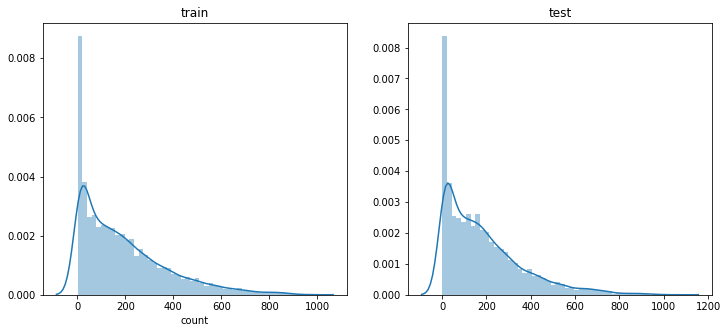

In [205]:
fig, (ax1, ax2) = plt.subplots(ncols = 2)
fig.set_size_inches(12, 5)

sns.distplot(y_train, ax = ax1, bins = 50)
ax1.set(title = "train")
sns.distplot(np.exp(predsTest), ax = ax2, bins = 50)
ax2.set(title = "test")

# Model Fit (Train)

In [206]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=79, verbose=0, warm_start=False)

# Feature Selection & Sorting

In [207]:
print(list(zip(feature_names, gbm.feature_importances_)))
# f_imp = df(feature_names, model.feature_importances_)

feature_df = list(zip(feature_names, model.feature_importances_))
feature_df = pd.DataFrame(feature_df)

# display(pd.DataFrame(feature_df))
# feature_df.columns

[('hour', 0.26282481282351033), ('year', 0.028316956008899573), ('temp_encode', 0.012955786103289124), ('dayofweek', 0.11734389484526737), ('workingday', 0.03801516536630802), ('atemp', 0.13348175642504986), ('humidity', 0.1513847008798634), ('weather', 0.052170021566987065), ('season', 0.016420849856477005), ('windspeed', 0.11686126683376345), ('month', 0.07022478929058457)]


In [208]:
feature_df.columns = feature_df.columns.astype(str)
# RangeIndex(start=0, stop=2, step=1)로 되어 있던 것은 문자로 변경

feature_df.columns = ["feature", "importance"]
# 컬럼명 변경, 아래처럼 하는 것은 안됨
# feature_df.rename(columns={'0':"feature", '1':"feature_importance"})

feature_df.sort_values(by=['importance', 'feature'], ascending=[False, True], inplace=True)
# importance 먼저 정렬, 그리고 importance 정렬

feature_df

,feature,importance
0,hour,0.602932
5,atemp,0.091541
1,year,0.087218
4,workingday,0.053208
10,month,0.052987
3,dayofweek,0.042039
6,humidity,0.029765
7,weather,0.014601
9,windspeed,0.009101
2,temp_encode,0.008679


In [209]:
feature_df["feature"].values # 중요도 순으로 피처를 나열함

array(['hour', 'atemp', 'year', 'workingday', 'month', 'dayofweek',
       'humidity', 'weather', 'windspeed', 'temp_encode', 'season'],
      dtype=object)

# Model Prediction & Graph Check

In [210]:
predictions = model.predict(X_test)
print(predictions.shape)
predictions[0:10]

(6493,)


array([ 10.82,   4.96,   4.09,   3.86,   3.28,   4.7 ,  35.43,  90.89,
       196.95, 123.02])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[Text(0.5,1,'test')]

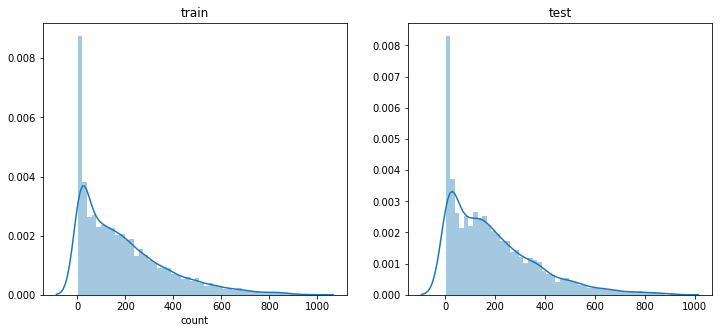

In [211]:
fig, (ax1, ax2) = plt.subplots(ncols = 2)
fig.set_size_inches(12, 5)

sns.distplot(y_train, ax = ax1, bins = 50)
ax1.set(title = "train")
sns.distplot(predictions, ax = ax2, bins = 50)
ax2.set(title = "test")

# Submission

In [212]:
predictions

array([ 10.82,   4.96,   4.09, ..., 139.65, 112.69,  62.4 ])

In [213]:
submission = pd.read_csv("data/bike/sampleSubmission.csv")
submission

submission["count"] = predictions

print(submission.shape)
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,10.82
1,2011-01-20 01:00:00,4.96
2,2011-01-20 02:00:00,4.09
3,2011-01-20 03:00:00,3.86
4,2011-01-20 04:00:00,3.28


In [214]:
# RandomForest 파일 내보내기
# submission.to_csv("data/bike/Score_RMSLE_{0: .5f}_submission.csv".format(score), index=False)

# Submission - GBM

In [215]:
submission = pd.read_csv("data/bike/sampleSubmission.csv")
submission

submission["count"] = np.exp(predsTest)

print(submission.shape)
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,11.545500
1,2011-01-20 01:00:00,5.389972
2,2011-01-20 02:00:00,3.648206
3,2011-01-20 03:00:00,2.990197
4,2011-01-20 04:00:00,2.369863


In [216]:
submission.to_csv("data/bike/Score_RMSLE_{0: .5f}_gbm_submission.csv".format(score_gbm), index=False)